# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2024

Мягкий дедлайн: 22.12.2024 23:59 MSK

Жёсткий дедлайн: 22.12.2024 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг. Однако с большой силой приходит и большая ответственность, так что заодно научимся, как его правильно готовить

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split

sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
X = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (оставьте `random_state=1337` для воспроизводимости).

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=1337)

X_train.shape, X_valid.shape, X_test.shape

((18825, 169), (2354, 169), (2353, 169))

---

## Задание 1. Базовый градиентный бустинг (4 балла + 0.5 бонус)

Первая часть посвящена реализации собственного градиентного бустинга. Обращаем внимание, что пользоваться готовыми реализациями <font color='lightcoral'>**нельзя**</font>, если специально не оговорено. На все <font color='plum'>**вопросы**</font> должен быть <font color='plum'>**ответ**</font>. В заданиях есть референсы для параметров, которые нужно сделать, на случай, если объяснение из ноутбука непонятно, тогда советуем обратиться к соответствующей документации

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

Обязательные параметры:
 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$

#### `fit`

В `fit` приходит выборка, на которой мы обучаем новые базовые модели

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на выборке (используем `loss_fn` для этого) и найти новую оптимальную гамму

После всего цикла обучения надо нарисовать график (если `plot=True`).

#### `partial_fit`

В `partial_fit` приходит обучающая выборка, на которую обучается новая базовая модель

#### `predict_proba`

В `predict_proba` приходит любая выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду

#### `plot_history`

В `plot_history` приходит любая выборка, для которой последовательно считаются значения функции потерь и/или любой метрики, которую вы хотите посчитать, путем последовательного применения базовых моделей. Можно делать сразу во время обучения, можно делать иначе

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

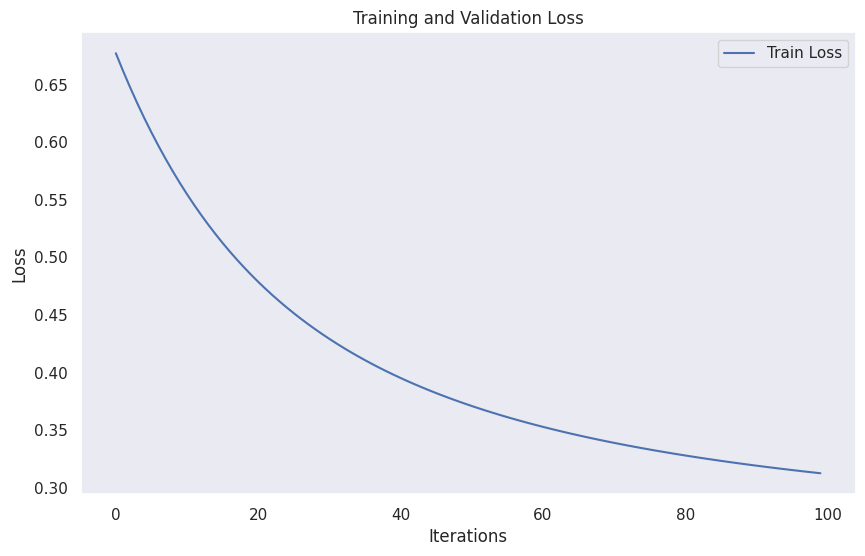

Train ROC-AUC 0.9998
Valid ROC-AUC 0.9074
Test ROC-AUC 0.9048


In [ ]:
boosting = Boosting(plot=True, n_estimators=100)

boosting.fit(X_train, y_train)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(X_test).shape == (X_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(X_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(X_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(X_test, y_test):.4f}')

### Бонус. Бустинг линейных моделей (0.5 балла)

**<font color='plum'>Вопрос:** что произойдет при ансамблировании линейных моделей? Имеет ли это смысл?</font>

<font color='plum'>**Ответ:** Ансамблирование линейных моделей во многих случаях бессмысленно. Если данные уже линейно разделимы, одной линейной модели вполне достаточно. Более того, ансамблирование может повысить риск переобучения, и в такой ситуации модель с простой регуляризацией окажется более эффективной. Если же ансамблирование выполняется на одной и той же выборке, а не на разных её подвыборках, то в этом случае оно вообще теряет смысл.</font>

Давайте убедимся. Обучите бустинг, где в качестве базовой модели будет линейная регрессия. Обязательно сохраните историю функции потерь и зафиксируйте время обучения. Можно взять уже готовый из <font color='lightblue'>XGBoost</font>, но будьте готовы разобраться с тем, как оттуда достать историю обучения

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="gblinear")` | - | - |

In [6]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import time

dtrain_reg = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

params = {"booster": "gblinear", "verbosity": "1", "objective": "reg:squarederror"}
history = {"train_loss": [], "test_loss": []}
n = 100

start_time = time.time()

model = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=[(dtrain_reg, "train"), (dtest_reg, "test")],
    evals_result=history,
    verbose_eval=True
)

end_time = time.time()
training_time = end_time - start_time
preds = model.predict(dtest_reg)

[0]	train-rmse:0.35016	test-rmse:0.36871
[1]	train-rmse:0.33275	test-rmse:0.35608
[2]	train-rmse:0.32548	test-rmse:0.35010
[3]	train-rmse:0.32152	test-rmse:0.34645
[4]	train-rmse:0.31919	test-rmse:0.34412
[5]	train-rmse:0.31776	test-rmse:0.34260
[6]	train-rmse:0.31685	test-rmse:0.34160
[7]	train-rmse:0.31627	test-rmse:0.34092
[8]	train-rmse:0.31589	test-rmse:0.34047
[9]	train-rmse:0.31564	test-rmse:0.34016
[10]	train-rmse:0.31547	test-rmse:0.33994
[11]	train-rmse:0.31535	test-rmse:0.33980
[12]	train-rmse:0.31526	test-rmse:0.33970
[13]	train-rmse:0.31519	test-rmse:0.33963
[14]	train-rmse:0.31514	test-rmse:0.33958
[15]	train-rmse:0.31510	test-rmse:0.33955
[16]	train-rmse:0.31507	test-rmse:0.33952
[17]	train-rmse:0.31505	test-rmse:0.33951
[18]	train-rmse:0.31503	test-rmse:0.33950
[19]	train-rmse:0.31501	test-rmse:0.33950
[20]	train-rmse:0.31499	test-rmse:0.33950
[21]	train-rmse:0.31498	test-rmse:0.33950
[22]	train-rmse:0.31496	test-rmse:0.33950
[23]	train-rmse:0.31495	test-rmse:0.33951
[2

Теперь возьмите `sklearn.linear_model.SGDClassifier` иобучите на тех же данных. Не забудьте вытащить историю функции потерь

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import log_loss

clf = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss="log_loss", max_iter=1, warm_start=True, tol=None, random_state=42)
)

n_iter = 100
losses = []

start_time = time.time()
for _ in range(n_iter):
    clf.named_steps['sgdclassifier'].partial_fit(X_train, y_train, classes=np.unique(y_train))
    y_pred_proba = clf.named_steps['sgdclassifier'].predict_proba(X_train)
    loss = log_loss(y_train, y_pred_proba)
    losses.append(loss)

end_time = time.time()
training_time_sgd = end_time - start_time

Покажите на одном графике изменение функции потерь для бустинга и SGD классификатора. Сравните следующие параметры у бустинга и линейной модели:

- время обучения
- число итераций до сходимости
- графики функции потерь

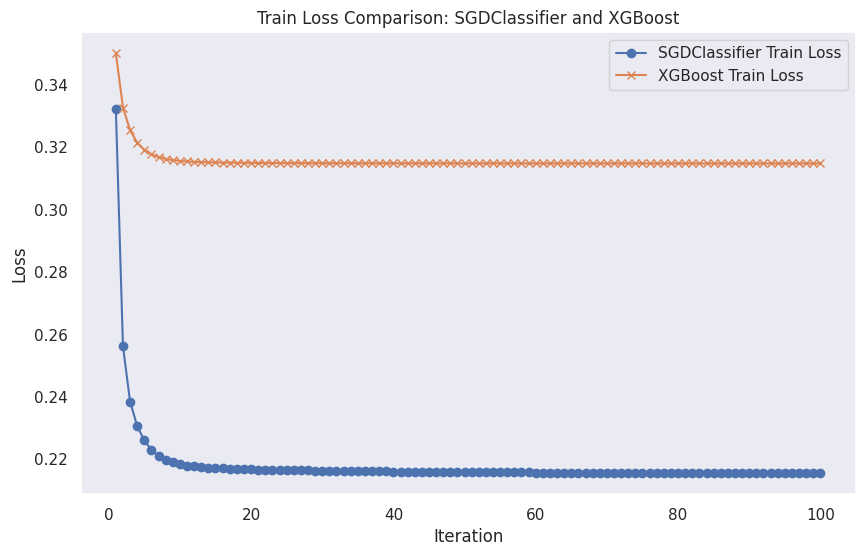

In [8]:
sgd_losses = losses
xgb_losses = history['train']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sgd_losses) + 1), sgd_losses, label="SGDClassifier Train Loss", linestyle='-', marker='o')
plt.plot(range(1, len(xgb_losses) + 1), xgb_losses, label="XGBoost Train Loss", linestyle='-', marker='x')


plt.title("Train Loss Comparison: SGDClassifier and XGBoost")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.show()

In [ ]:
print(f"Время обучения для XGBoost: {training_time:.4f} сек\n"
      f"Время обучения для SGDClassifier: {training_time_sgd:.4f} сек")
print(f"Число итераций до сходимости для XGBoost: {len(sgd_losses)} \n"
      f"Число итераций до сходимости для SGDClassifier: {len(xgb_losses)}")

Время обучения для XGBoost: 0.9761 сек
Время обучения для SGDClassifier: 4.0134 сек
Число итераций до сходимости для XGBoost: 100 
Число итераций до сходимости для SGDClassifier: 100


<font color='plum'>**Вопрос:** Какой вывод вы можете сделать?</font>

<font color='plum'>**Ответ:** Первое, на что стоит обратить внимание, — число итераций до сходимости одинаковое для обеих моделей. Это наталкивает на мысль о схожей скорости стабилизации процесса обучения. Однако время обучения различается значительно: SGDClassifier оказался в четыре раза медленнее XGBoost. Здесь, вероятно, сказывается то, что я обучала SGDClassifier с помощью цикла, чтобы сохранить значения функции потерь.

Если говорить о самих лоссах, они у SGDClassifier заметно ниже по сравнению с XGBoost. Как я уже отмечала, ансамблирование линейных моделей нередко сталкивается с риском переобучения, что может привести к снижению качества обучения.</font>

---

## Задание 2. Имплементация гиперпараметров (2.5 балла + 3 бонус)

Бустинг, как метод агрегации, предлагает несколько вариантов регуляризации безотносительно базовой модели. В этом пункте предлагается имплементировать часть из них. При необходимости можете обратиться к реализациям в вашей любимой библиотеке, там могут быть дополнительные пояснения и/или ссылки на оригинальные статьи

<font color='lightcoral'>**Важно!**</font> После добавления каждого параметра проверьте, как это повлияет на качество. Специально крутить параметры не нужно, но важно увидеть, что перформанс модели изменился, в худшую или в лучшую сторону, лучше всего это видно по графикfv обучения <font color='lightcoral'>**на трейне и валидации**</font>, последнюю мы сейчас и оформим

### 2.1. Борьба с переобучением (0.5 балла)

Как известно, бустинги бывают склонны к переобучению. Чтобы этого не допустить, можно контролировать процесс обучения и проверять критерий останова на валидации. Реализуйте такую процедуру, не забудьте, что всю предобработку, что вы будете делать для трейна, нужно будет повторить на валидации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| <td colspan=3>`early_stopping_rounds`, `eval_set` |

Добавьте параметры:
- `early_stopping_rounds: int | None = 10` - число раундов для критерия останова. Если качество ухудшается на протяжении всех раундов, останавливаем обучение
- `X_val`, `y_val` или `eval_set: Tuple[np.ndarray] | None = None` - валидацонная выборка, на которой будем проверять переобучение

In [61]:
from xgboost import XGBRegressor

model = XGBRegressor(
    booster="gbtree",
    n_estimators=1000,
    learning_rate=0.1,
    early_stopping_rounds=10,
    eval_metric="rmse",
    random_state=42
)
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)]
)

results = model.evals_result()
val_loss = results["validation_0"]["rmse"]

[0]	validation_0-rmse:0.44786
[1]	validation_0-rmse:0.42395
[2]	validation_0-rmse:0.40384
[3]	validation_0-rmse:0.38701
[4]	validation_0-rmse:0.37278
[5]	validation_0-rmse:0.36075
[6]	validation_0-rmse:0.35086
[7]	validation_0-rmse:0.34252
[8]	validation_0-rmse:0.33579
[9]	validation_0-rmse:0.32997
[10]	validation_0-rmse:0.32532
[11]	validation_0-rmse:0.32176
[12]	validation_0-rmse:0.31808
[13]	validation_0-rmse:0.31537
[14]	validation_0-rmse:0.31338
[15]	validation_0-rmse:0.31130
[16]	validation_0-rmse:0.30998
[17]	validation_0-rmse:0.30869
[18]	validation_0-rmse:0.30737
[19]	validation_0-rmse:0.30642
[20]	validation_0-rmse:0.30557
[21]	validation_0-rmse:0.30521
[22]	validation_0-rmse:0.30454
[23]	validation_0-rmse:0.30388
[24]	validation_0-rmse:0.30336
[25]	validation_0-rmse:0.30263
[26]	validation_0-rmse:0.30225
[27]	validation_0-rmse:0.30191
[28]	validation_0-rmse:0.30166
[29]	validation_0-rmse:0.30148
[30]	validation_0-rmse:0.30113
[31]	validation_0-rmse:0.30079
[32]	validation_0-

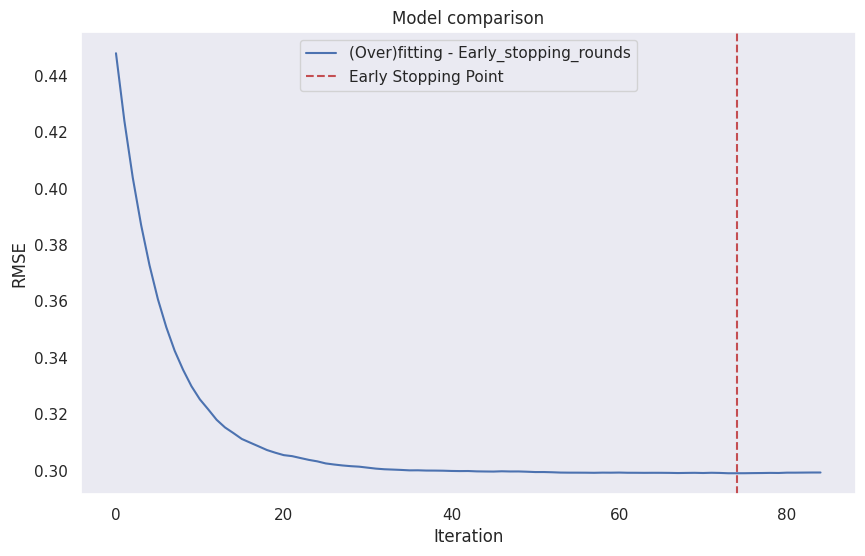

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(val_loss, label="(Over)fitting - Early_stopping_rounds")
plt.axvline(model.best_iteration, color='r', linestyle='--', label="Early Stopping Point")
plt.title("Model comparison")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

### 2.2. Бутстрап (0.5 балла)
Как известно, при обучении базовых алгоритмов в беггинге, используется бутстрапированная выборка. Звучит хайпово, почему бы не попробовать сделать то же самое в бустинге?

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `subsample`, - | `subsample`, `bagging`| `subsample`, `bootstrap_type`|

Вам нужно реализовать параметры:
- `subsample: float | int = 0.6` - доля или число объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей). Соответствует бутстрапу типа `Bernoulli`. Каждый объект либо входит в подвыборку, либо нет
- `bagging_temperature: float | int = 1.0` - веса объектов, которые попадают в выборку. Соответствует бутстрапу типа `Bayesian`. Каждый объект имеет определенный вес $t$, на который впоследствии домножается по формуле $w = -log(X^t)$, где $X \sim {U[0, 1]}$, после чего попадает в выборку. Таким образом можно сделать симуляцию повторений
- `bootstrap_type: str | None = 'Bernoulli'` - тип бутстрапа

<font color='plum'>**Вопрос:** как бутстрап может помочь в обучении с точки зрения смещения, разброса и вообще?</font>

<font color='plum'>**Ответ:** Бутстрап в обучении снижает разброс модели, делая её более устойчивой к шуму в данных и выбросам за счёт обучения на случайных подвыборках. Ансамбль усредняет показания нескольких слабых моделей, и если одна модель переобучилась на некоторых аномалиях, то другие модели компенсируют это, поскольку в их выборку эти аномалии либо не войдут, либо войдут в малом количестве. Тем не менее бутстрап увеличит немного смещение, потому что модели будут обучаться не на всех данных, а лишь на подвыборках. </font>

In [11]:
model_bootstrap = XGBRegressor(
    booster="gbtree",
    n_estimators=1000,
    learning_rate=0.1,
    subsample = 0.6,
    early_stopping_rounds=10,
    eval_metric="rmse",
    random_state=42
)
model_bootstrap.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=True
)

results_bootstrap = model_bootstrap.evals_result()
val_loss_bootstrap = results_bootstrap["validation_0"]["rmse"]

[0]	validation_0-rmse:0.44819
[1]	validation_0-rmse:0.42439
[2]	validation_0-rmse:0.40453
[3]	validation_0-rmse:0.38762
[4]	validation_0-rmse:0.37317
[5]	validation_0-rmse:0.36102
[6]	validation_0-rmse:0.35052
[7]	validation_0-rmse:0.34259
[8]	validation_0-rmse:0.33564
[9]	validation_0-rmse:0.33042
[10]	validation_0-rmse:0.32585
[11]	validation_0-rmse:0.32166
[12]	validation_0-rmse:0.31840
[13]	validation_0-rmse:0.31605
[14]	validation_0-rmse:0.31318
[15]	validation_0-rmse:0.31116
[16]	validation_0-rmse:0.30973
[17]	validation_0-rmse:0.30838
[18]	validation_0-rmse:0.30726
[19]	validation_0-rmse:0.30662
[20]	validation_0-rmse:0.30577
[21]	validation_0-rmse:0.30526
[22]	validation_0-rmse:0.30475
[23]	validation_0-rmse:0.30446
[24]	validation_0-rmse:0.30401
[25]	validation_0-rmse:0.30379
[26]	validation_0-rmse:0.30340
[27]	validation_0-rmse:0.30295
[28]	validation_0-rmse:0.30274
[29]	validation_0-rmse:0.30274
[30]	validation_0-rmse:0.30241
[31]	validation_0-rmse:0.30187
[32]	validation_0-

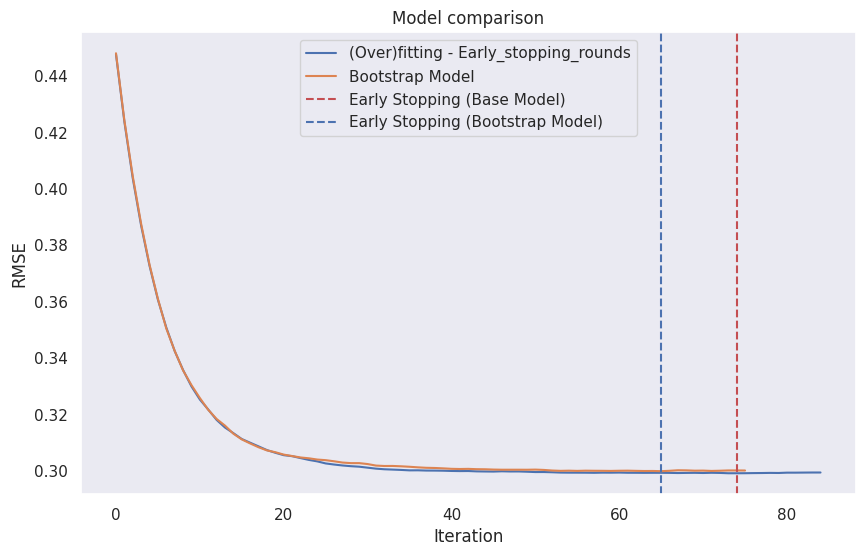

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(val_loss, label="(Over)fitting - Early_stopping_rounds")
plt.plot(val_loss_bootstrap, label="Bootstrap Model")
plt.axvline(model.best_iteration, color='r', linestyle='--', label="Early Stopping (Base Model)")
plt.axvline(model_bootstrap.best_iteration, color='b', linestyle='--', label="Early Stopping (Bootstrap Model)")
plt.title("Model comparison")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

### Бонус. GOSS (0.5 балла)

Заметим, что во время обучения не все объекты одинаково важны. Один из вариантов это исправить - ввести какие-то веса на объекты, однако можно пойти чуть хитрее. В <font color='lightgreen'>LightGBM</font> придумали подход [Gradient-based One-side Sampling](https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf)

Давайте оценивать важность объектов в отдельный момент обучения нового дерева. Будем считать, какой антиградиент привносит каждый объект. Далее разобъем градиенты на 2 группы. Объекты с большими градиентами берутся все, с маленькими - только часть, по аналогии с бутстрапом, с отрицательными - выкидываются. И не забываем домножить на фактор, чтобы учесть выкинутые объекты. Подробнее в статье

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| - | `bagging=goss`| `bootstrap_type=MVS`|

Параметры, которые нужно сделать:

- `goss: bool | None = True` - GOSS бустинг или нет
- `goss_k: float | int = 0.2` - доля объектов, градиенты которых будем считать большими. Все остальное - маленькими
- `subsample: float | int = 0.3` - параметры сэмплинга для маленьких градиентов из пункта 2.1

In [66]:
import lightgbm as lgb

model_goss = lgb.LGBMRegressor(
    boosting_type="goss",
    n_estimators=1000,
    learning_rate=0.1,
    metric="rmse",
    early_stopping_round=10,
    random_state=42
)

model_goss.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)]
)

results_goss = model_goss.evals_result_
val_loss_goss = results_goss['valid_0']['rmse']

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 161
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_st

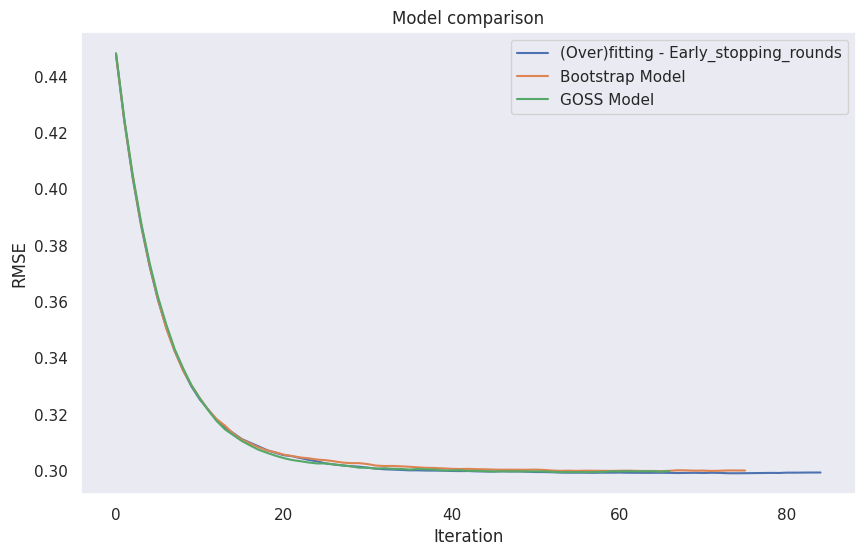

In [70]:
plt.figure(figsize=(10, 6))

plt.plot(val_loss, label="(Over)fitting - Early_stopping_rounds")
plt.plot(val_loss_bootstrap, label="Bootstrap Model")
plt.plot(val_loss_goss, label="GOSS Model")


plt.title("Model comparison")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

### 2.3. Работа с признаками (1 балл)

1. Помимо выбора случайных объектов, есть идея выбирать случайное подмножество признаков, заложенная в Random Forest. Мотивация это делать точно та же самая, что и в бутстрапировании, за это будет отвечать `rsm`

2. С другой стороны, вместо того, чтобы выкидывать признаки, можно попробовать проредить их множество значений, применив бинаризацию. В идеале это стоит делать с датасетом до обучения модели, но не обязательно, можно, например, на этапе `fit`, а в `partial_fit` приходит уже квантизованный датасет. Для этого существует множество алгоритмов, мы предлагаем сделать два наиболее простых:

- $\text{Uniform}$. Значения признака $[\min f_i, \max f_i]$ отображаются в `nbins` отрезков одинаковой длины, которые полностью покрывают интервал
- $\text{Quantile}$. Тот же самый отрезок сортируется и бьется на `nbins` квантилей от 0 до 1

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `colsample_bytree`, `tree_method` | `colsample_bytree`, `max_bin`| `rsm`, `quantize(...)`|

Нужно добавить параметры:
- `rsm: float | int = 0.6` - доля или число признаков, участвующих в обучении модели. Каждый признак либо входит, либо не входит в пул, на котором обучается базовый алгоритм, по аналогии с бутстрапом Бернулли
- `quantization_type: str | None = True` - тип квантизации, если она есть
- `nbins: int = 255` - число бинов для квантизации, можно оставить дефолтное значение. Игнорируем, если тип квантизации не указан

<font color='plum'>**Вопрос**: как квантизация поможет в обработке выбросов и нанов?</font>

<font color='plum'>**Ответ**: Квантизация помогает снизить влияние выбросов, потому что такие значения распределяются в крайние квантили или бины. Эти интервалы обычно достаточно гомогенны, поэтому выбросы теряют своё значение как сильные аномалии и оказывают меньшее влияние на модель.

Что касается NaN, интервалы квантизации определяются только на основе существующих значений. Это позволяет избежать необходимости заполнять пропуски средними, медианами или другими способами. </font>

<font color='plum'>**Вопрос**: можно ли просто заполнить наны каким-то числом? Имеет ли значение, что это за число (-1, -100, -1e32)?</font>

<font color='plum'>**Ответ**: Простое заполнить NaN каким-то числом может повлиять на качество модели. Например, если заполнить пропуски значением, которое не связано с истинным смыслом данных, модель может интерпретировать его как значимый паттерн и попытаться связать его с целевой переменной.

Хотя, возможно, если использовать заполнение по целевой переменной (как в методе mean-target encoding), то это может быть более осмысленным. В этом подходе пропуски заполняются значениями, которые рассчитываются на основе целевой переменной, это позволит использовать заполнение пропущенных данных случайным числом более осмысленно. </font>

In [68]:
model_features = lgb.LGBMRegressor(
    boosting_type="goss",
    n_estimators=1000,
    learning_rate=0.1,
    metric="rmse",
    early_stopping_round=10,
    random_state=42,
    colsample_bytree=0.6,
    max_bin=255,
)

model_features.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)]
)

results_features = model_features.evals_result_
val_loss_features = results_features['valid_0']['rmse']

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 161
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_st

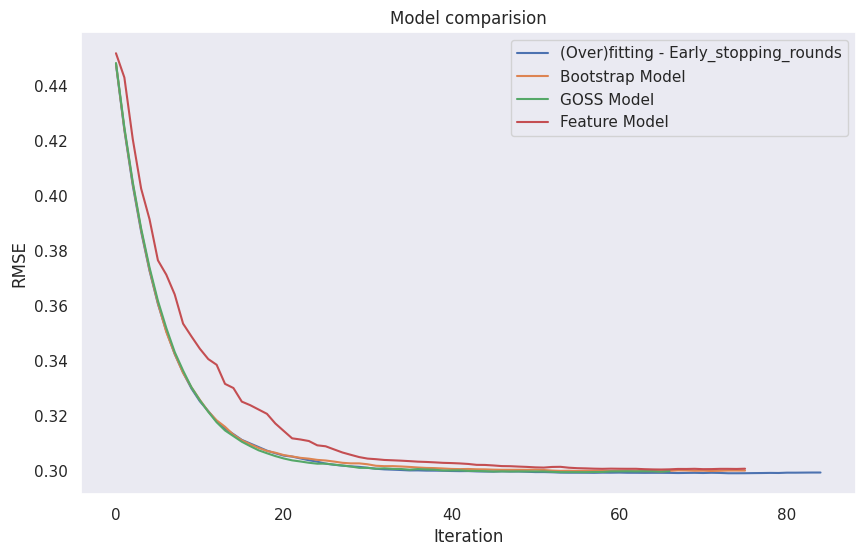

In [71]:
plt.figure(figsize=(10, 6))

plt.plot(val_loss, label="(Over)fitting - Early_stopping_rounds")
plt.plot(val_loss_bootstrap, label="Bootstrap Model")
plt.plot(val_loss_goss, label="GOSS Model")
plt.plot(val_loss_features, label="Feature Model")


plt.title("Model comparision")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

### Бонус. Квантизация (1 балл)

В текущих имплементациях бустинга используются более сложные методы квантизации. К сожалению, способы выше страдают либо от неравноправности бинов - в каких-то объектов больше, в каких-то меньше, либо от того, что целевая переменная от бинов зависит опосредованно. Предлагается это исправить следующими способами:

1. $\text{MinEntropy}$. Это [один из методов](https://catboost.ai/docs/en/concepts/quantization), который используется для бинаризации в <font color='palegoldenrod'>CatBoost</font>, остальные на него очень похожи. Будем жадно набирать бины так, чтобы энтропия объектов внутри ($\sum_{i \in \text{bin}} x_i\log(x_i)$) была как можно меньше. Сделать такое разбиение руками непросто, но вам эта задача должна что-то напоминать
   
2. $\text{PiecewiseEncoding}$. Это относительно свежий метод для [табличных трансформеров](https://arxiv.org/pdf/2203.05556). Суть заключается в том, что бины для квантизации будем брать не с потолка, а именно те, что нужны для разбиения таргета. (В статье делается кодирование в вектор длины $T$, где $T$ число бинов, в нашем случае это излишне, бинов можно оставить столько же, но взять лмшь закодированную по формуле часть)

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| - | - | `feature_border_type="MinEntropy"` |

Нужно добавить опцию:

- `quantization_type: str | None = 'MinEntropy'` - какую квантизацию используем

Реализуйте оба способа подсчета (или один, но тогда балл неполный) и сравните, удалось ли улучшить качество?

In [25]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [45]:
from catboost import CatBoostRegressor
model_minentropy = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    eval_metric="RMSE",
    random_seed=42,
    early_stopping_rounds=10,
    colsample_bylevel=0.6,
    feature_border_type="MinEntropy",
    verbose=100
)
model_minentropy.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)]
)

eval_results = model_minentropy.get_evals_result()

rmse_history = eval_results["validation"]["RMSE"]

0:	learn: 0.4515589	test: 0.4516650	best: 0.4516650 (0)	total: 4.68ms	remaining: 4.67s
100:	learn: 0.2578355	test: 0.2988930	best: 0.2988930 (100)	total: 385ms	remaining: 3.43s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2965076236
bestIteration = 189

Shrink model to first 190 iterations.


In [26]:
from sklearn.preprocessing import KBinsDiscretizer

X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_valid_dense = X_valid.toarray() if hasattr(X_valid, "toarray") else X_valid

n_bins = 10
piecewise_encoder = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

X_train_encoded = piecewise_encoder.fit_transform(X_train_dense)
X_valid_encoded = piecewise_encoder.transform(X_valid_dense)

In [72]:
model_piecewise = lgb.LGBMRegressor(
    boosting_type="goss",
    n_estimators=1000,
    learning_rate=0.1,
    metric="rmse",
    early_stopping_round=10,
    random_state=42,
    colsample_bytree=0.6
)

model_piecewise.fit(
    X_train_encoded, y_train,
    eval_set=[(X_valid_encoded, y_valid)]
)

results_piecewise = model_piecewise.evals_result_
val_loss_piecewise = results_piecewise['valid_0']['rmse']

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 161
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_st

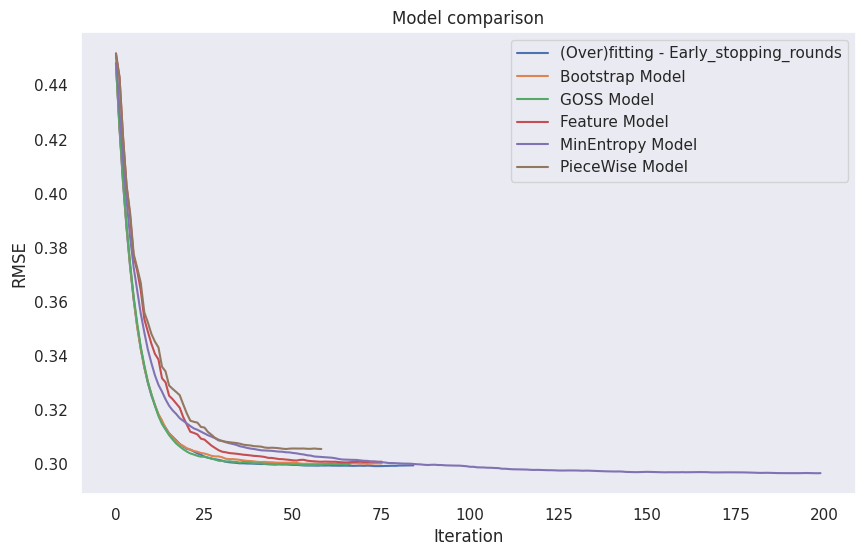

In [73]:
plt.figure(figsize=(10, 6))

plt.plot(val_loss, label="(Over)fitting - Early_stopping_rounds")
plt.plot(val_loss_bootstrap, label="Bootstrap Model")
plt.plot(val_loss_goss, label="GOSS Model")
plt.plot(val_loss_features, label="Feature Model")
plt.plot(rmse_history, label="MinEntropy Model")
plt.plot(val_loss_piecewise, label="PieceWise Model")


plt.title("Model comparison")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

Да, применение метода MinEntropy для квантизации признаков позволило улучшить качество модели.

### 2.4. Важность признаков (0.5 балла)

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так). Разумеется, способ не единственный, если хочется, посмотрите в документации

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `model.get_score()` | `lightgbm.importance()` | `model.get_feature_importance()` |

Допишите в вашей реализации бустинга атрибут `feature_importances_` чтобы она возвращала описанные выше важности признаков.

In [48]:
from boosting import Boosting

boosting = Boosting(n_estimators=100)

boosting.fit(X_train, y_train)

print(model.feature_importances_)

[1.1874050e-02 2.0067511e-02 1.8559899e-02 6.5968619e-03 9.5566567e-03
 5.1936195e-03 8.5139833e-03 5.6059100e-03 6.3900920e-03 8.6693997e-03
 2.1882549e-02 3.7665865e-03 6.6474015e-03 0.0000000e+00 2.6708075e-03
 9.2738252e-03 8.6737203e-04 6.6519058e-03 1.6440925e-03 3.7869646e-03
 1.6369801e-02 2.0736475e-02 1.5217146e-03 0.0000000e+00 1.9293757e-02
 7.1005886e-03 0.0000000e+00 1.0387043e-02 0.0000000e+00 1.5498779e-03
 8.0255810e-03 3.7728285e-03 1.0660945e-02 0.0000000e+00 2.0292762e-03
 4.7787684e-03 3.3240274e-02 6.9853105e-03 0.0000000e+00 0.0000000e+00
 2.0168535e-03 0.0000000e+00 2.0676509e-03 2.9738082e-03 0.0000000e+00
 1.6491109e-03 8.2752795e-06 0.0000000e+00 2.9472045e-03 0.0000000e+00
 3.0790675e-03 2.9001844e-03 1.4892892e-03 1.3851506e-03 0.0000000e+00
 1.3782106e-03 0.0000000e+00 5.8676335e-03 0.0000000e+00 4.7299536e-03
 1.8942486e-03 0.0000000e+00 4.7807107e-03 2.5381476e-03 9.0289942e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.2526287e-07 1.0380912e-02
 7.405

Покажите, какие признаки оказались самыми важными

In [51]:
feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
feature_importances = boosting.feature_importances_

importances_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
})

importances_df = importances_df.sort_values(by="Importance", ascending=False)

print("Top 10 most important features:")
print(importances_df.head(10))

Top 10 most important features:
         Feature  Importance
166  Feature 166    0.557294
164  Feature 164    0.177281
168  Feature 168    0.030150
165  Feature 165    0.030003
36    Feature 36    0.013786
158  Feature 158    0.013295
142  Feature 142    0.012036
162  Feature 162    0.009762
161  Feature 161    0.008904
167  Feature 167    0.008795


### Бонус. DART (1.5 балла)

Ранее мы обсуждали, что каждый базовый алгоритм пытается исправить ошибки всего предыдущего ансамбля. Из-за этого возникает неравноправие - каждая новая модель вносит все меньший и меньший вклад. Уверенные обучатели нейросетей знают, что это может привести к переобучению. Но выход есть, и выход этот [DART](https://arxiv.org/pdf/1505.01866)!

В DL есть такой вид регуляризации, как dropout, когда некоторые узлы нейросети со случайным шансом отключаются. Можно попробовать обобщить этот подход на случай бустингов и случайно выкидывать деревья из композиции во время обучения

1. Выбираем, какие деревья убрать. При подсчете антиградиента берем не весь ансамбль, а только ту часть, что осталась
2. Домножаем выходы дерева на $1/k$, где $k$ - число удаленных деревьев, чтобы учесть тот факт, что ансамбль был не весь. Тогда вклад отдельного дерева будет не настолько большим
3. Домножаем выкинутые деревья на $k/(k+1)$, чтобы масштабы выходов примерно совпадали

| <font color='lightblue'>XGBoost</font> | <font color='lightgreen'>LightGBM</font> | <font color='palegoldenrod'>CatBoost</font> |
| --- | --- | --- |
| `XGBClassifier(booster="dart")` | `LGBMClassifier(boosting_type="dart")` | - |

Параметры, которые нужно добавить:

- `dart: bool | None = False` - DART бустинг или нет
- `dropout_rate: int | float = 0.1` - доля деревьев, которую выкидываем во время обучения DART

In [56]:
print(lgb.__version__)

4.5.0


In [74]:
model_dropout = lgb.LGBMRegressor(
    boosting_type="dart",
    n_estimators=1000,
    learning_rate=0.1,
    metric="rmse",
    early_stopping_round=10,
    random_state=42,
    colsample_bytree=0.6,
    drop_rate=0.1
)

model_dropout.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)]
)


results_dropout = model_dropout.evals_result_
val_loss_dropout = results_dropout['valid_0']['rmse']

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 161
[LightGBM] [Info] Start training from score 0.650359


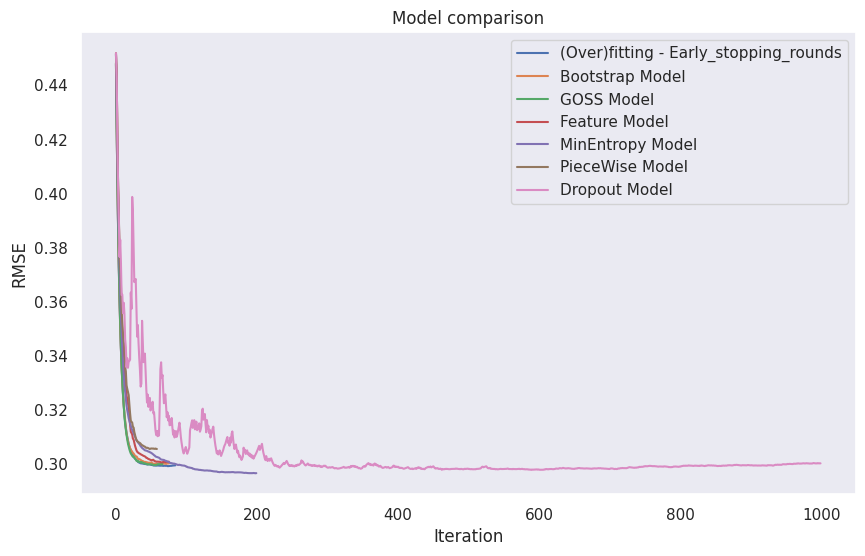

In [75]:
plt.figure(figsize=(10, 6))

plt.plot(val_loss, label="(Over)fitting - Early_stopping_rounds")
plt.plot(val_loss_bootstrap, label="Bootstrap Model")
plt.plot(val_loss_goss, label="GOSS Model")
plt.plot(val_loss_features, label="Feature Model")
plt.plot(rmse_history, label="MinEntropy Model")
plt.plot(val_loss_piecewise, label="PieceWise Model")
plt.plot(val_loss_dropout, label="Dropout Model")


plt.title("Model comparison")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

------

## Задание 3. Оптимизация (3.5 балла + 0.5 бонус)

Теперь давайте подумаем, как же правильно применять бустинги. Нас интересует: какие бустинги вообще бывают, как их правильно тюнить, и как интерпретировать

Оптимизация моделей с большим числом гиперпараметров это сложное дело. Нетрудно догадаться, что в случае, когда параметров $m$, сложность перебора в самом худшем случае будет порядка $n^m$. У бустингов, хотя на самом деле не только, эта проблема стоит особенно остро. Подумаем, как это делать умнее

### 3.1. Знакомство с optuna (1 балл)

Для эффективного подбора гиперпараметров существует несколько решений, основанных на байесовской оптимизации. В этом задании предлагается познакомиться с библиотекой [optuna](https://optuna.org/), которая делает перебор гиперпараметров легким и приятным, а также сохраняет всю историю экспериментов в одно место за вас

Подберите на валидации оптимальные значения следующих гиперпараметров для вашей реализации бустинга:
- `max_depth`
- `n_estimators`
- `learning_rate`
- любые другие параметры, которые вам понравились

Заметим, что оптуна это крайне гибкая библиотека, в которой можно реализовать абсолютно любую логику, которую пожелаете. За вас там есть лишь выбор модели. Чтобы не плодить несколько `objective`, можно слегка менять тело функции, например, добавить опциональные параметры, но шаблоном пользоваться не обязательно, как обычно

Подберите диапазон параметров самостоятельно, не забывайте фиксировать сид (нет, его не нужно перебирать). Сохраните и покажите оптимальный набор параметров. Сравните графики функций потерь для оптимального и дефолтного бустингов. Покажите, какие параметры дали наибольший прирост (для этого придется почитать документацию оптуны)

In [8]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.2 MB/s eta 0:00:00


In [9]:
import optuna

In [111]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
    }

    boosting = Boosting(**params)

    boosting.fit(X_train, y_train)

    loss_history = boosting.history
    trial.set_user_attr("loss_history", loss_history)

    final_loss = loss_history["train_loss"][-1]
    return final_loss

In [112]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)

print("Best parameters:", study.best_params)
print("Best loss:", study.best_value)

[I 2024-12-21 14:09:26,096] A new study created in memory with name: no-name-aa5e067d-e716-454c-99c4-f6290c982ce2
[I 2024-12-21 14:10:12,008] Trial 0 finished with value: 0.44277817006303344 and parameters: {'n_estimators': 99, 'learning_rate': 0.028360898264132784}. Best is trial 0 with value: 0.44277817006303344.
[I 2024-12-21 14:10:30,430] Trial 1 finished with value: 0.385717453284096 and parameters: {'n_estimators': 40, 'learning_rate': 0.1113001111558682}. Best is trial 1 with value: 0.385717453284096.
[I 2024-12-21 14:11:08,395] Trial 2 finished with value: 0.29261860213846813 and parameters: {'n_estimators': 85, 'learning_rate': 0.16487104251070872}. Best is trial 2 with value: 0.29261860213846813.
[I 2024-12-21 14:11:47,439] Trial 3 finished with value: 0.2709302132730509 and parameters: {'n_estimators': 83, 'learning_rate': 0.2938613441409767}. Best is trial 3 with value: 0.2709302132730509.
[I 2024-12-21 14:12:20,567] Trial 4 finished with value: 0.46450646696061615 and para

Best parameters: {'n_estimators': 83, 'learning_rate': 0.2938613441409767}
Best loss: 0.2709302132730509


In [113]:
importance = optuna.importance.get_param_importances(study)
print("Parameter importances:", importance)

Parameter importances: {'learning_rate': 0.761410487318619, 'n_estimators': 0.23858951268138098}


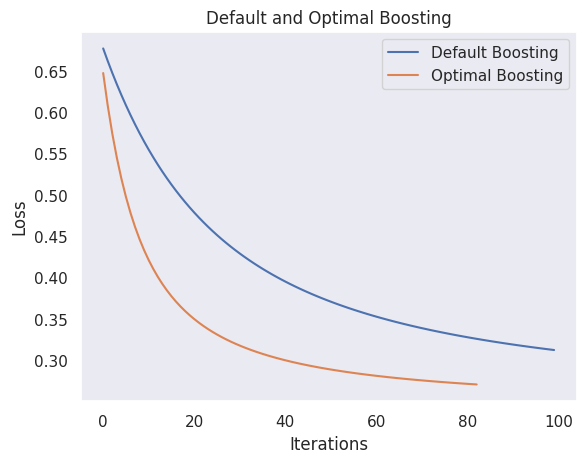

In [117]:
default_boosting = Boosting(n_estimators=100)
default_boosting.fit(X_train, y_train)
default_loss = default_boosting.history["train_loss"]

optimal_params = study.best_params
optimal_boosting = Boosting(**optimal_params)
optimal_boosting.fit(X_train, y_train)
optimal_loss = optimal_boosting.history["train_loss"]


plt.plot(default_loss, label="Default Boosting")
plt.plot(optimal_loss, label="Optimal Boosting")
plt.title("Default and Optimal Boosting")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### 3.2. Глубокая оптимизация (1 балл)

Помимо эффективного перебора гиперпараметров, `optuna` предлагает более тонкий контроль над самой процедурой обучения. Улучшите процедуру оптимизации следующим образом:

1. Посмотрите, как в `optuna` устроена запись в хранилища, и добавьте это в пайплайн оптимизации. Без указания БД все запуски оптуны сотрутся, как только закончится сессия. Более того, так можно распараллелить процесс оптимизации на несколько машин
2. Посмотрите, как можно контролировать процесс обучения бустинга при помощи прунера. У библиотечных имплементаций есть уже готовые, их можно использовать пунктом ниже. Для кастомной модели возьмите что-то из `optuna.pruners`. Идея прунера - не обучать бустинг до конца, если по истории видно, что другие бустинги на этом этапе статистически лучше.
3. Добавьте сохранение истории функции потерь и времени обучения в качестве `user_attribute` сразу в `study`. Мы не хотим оптимизировать их напрямую, но они нам понадобится для сравнения моделей в дальнейшем

Добавьте хранилище и юзер атрибуты и посмотрите, ускорилась ли оптимизация с добавлением прунера

In [90]:
import time
from optuna.pruners import MedianPruner

In [106]:
def objective_deep(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
    }

    boosting = Boosting(**params)

    start_time = time.time()
    boosting.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    trial.set_user_attr("training_time", training_time)

    loss_history = boosting.history
    trial.set_user_attr("loss_history", loss_history)

    final_loss = loss_history["train_loss"][-1]
    return final_loss

In [109]:
pruner = MedianPruner(n_startup_trials=5, n_warmup_steps=10)
study = optuna.create_study(
    study_name="custom_boosting_optimization",
    direction="minimize",
    storage="sqlite:///custom_boosting_study.db",
    load_if_exists=True,
    pruner=pruner,
)


study.optimize(objective_deep, n_trials=5)

[I 2024-12-21 14:03:14,389] Using an existing study with name 'custom_boosting_optimization' instead of creating a new one.
[I 2024-12-21 14:03:52,596] Trial 2 finished with value: 0.5680759211904078 and parameters: {'n_estimators': 71, 'learning_rate': 0.013731610659371282}. Best is trial 0 with value: 0.2766311003626471.
[I 2024-12-21 14:04:32,975] Trial 3 finished with value: 0.46333655650612116 and parameters: {'n_estimators': 73, 'learning_rate': 0.0327288388565649}. Best is trial 0 with value: 0.2766311003626471.
[I 2024-12-21 14:05:02,668] Trial 4 finished with value: 0.2818272451610601 and parameters: {'n_estimators': 65, 'learning_rate': 0.272767220547641}. Best is trial 0 with value: 0.2766311003626471.
[I 2024-12-21 14:05:07,789] Trial 5 finished with value: 0.4332979467452289 and parameters: {'n_estimators': 12, 'learning_rate': 0.2459202065841499}. Best is trial 0 with value: 0.2766311003626471.
[I 2024-12-21 14:05:14,961] Trial 6 finished with value: 0.5994804091771883 an

In [110]:
for trial in study.trials:
    print(f"Trial {trial.number}:")
    print(f"  Parameters: {trial.params}")
    print(f"  Loss history: {trial.user_attrs.get('loss_history', 'Not recorded')}")
    print(f"  Training time: {trial.user_attrs.get('training_time', 'Not recorded')}")
    print(f"  Final loss: {trial.value}")
    print()

Trial 0:
  Parameters: {'n_estimators': 84, 'learning_rate': 0.24326372170353908}
  Loss history: {'train_loss': [0.6550607815200494, 0.6214396070948994, 0.5917271678861598, 0.5654216920168387, 0.542078318492979, 0.5213074434138536, 0.502770792986399, 0.4861763704202681, 0.4712730452351927, 0.4578452587536205, 0.4457081092700586, 0.4347029404063525, 0.42469346877700037, 0.4155624363254772, 0.40720874603575774, 0.3995450281500497, 0.39249558139275437, 0.38599463601588296, 0.37998489024548543, 0.37441627742554934, 0.3692449269732655, 0.364432287727197, 0.35994438717983057, 0.35575120437078117, 0.3518261378863637, 0.3481455535139174, 0.3446883987000378, 0.3414358731292062, 0.3383711465385306, 0.33547911637444977, 0.33274619912988695, 0.3301601502195668, 0.3277099080941986, 0.32538545899197807, 0.32317771930404904, 0.32107843301036976, 0.3190800820412552, 0.317175807751982, 0.3153593419749628, 0.3136249463457008, 0.3119673587928773, 0.3103817462459615, 0.3088636627509426, 0.307409012300516

### 3.3. Готовые реализации (1 балл)

Библиотек для бустингов существует много, но активно используются лишь три. Ваша задача - попробовать их в деле, посмотреть на их уникальные фишки и понять, что вам нравится больше всего

Возьмите любую из популярных библиотек: <font color='lightblue'>`xgboost`</font>, <font color='lightgreen'>`lightgbm`</font>, <font color='palegoldenrod'>`catboost`</font>.
Ваша задача - взять одну из них, подобрать те же оптимальные параметры, что и выше, плюс что-то, что вам понравилось в них больше всего (может быть абсолютно любая фишка из пунктов выше или что-то, что вы найдете сами, не обязательно эксклюзивное), и сравнить две оптимизированные модели по
- динамике функции потерь (на обучающей и на валидационной выборке)
- времени обучения

In [122]:
def objective_catboost(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 500, 1500, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.6, 1.0),
        "feature_border_type": "MinEntropy",
        "random_seed": 42,
        "eval_metric": "RMSE",
        "early_stopping_rounds": 10,
        "verbose": 0,
    }

    model = CatBoostRegressor(**params)

    eval_set = [(X_train, y_train), (X_valid, y_valid)]
    start_time = time.time()
    model.fit(X_train, y_train, eval_set=eval_set)
    end_time = time.time()

    training_time = end_time - start_time
    trial.set_user_attr("training_time", training_time)

    loss_history = model.evals_result_["learn"]["RMSE"]
    trial.set_user_attr("loss_history", loss_history)

    final_loss = loss_history[-1]
    return final_loss

pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
study = optuna.create_study(
    study_name="catboost_optimization_minentropy",
    direction="minimize",
    pruner=pruner,
    storage="sqlite:///catboost_study.db",
    load_if_exists=True,
)


study.optimize(objective_catboost, n_trials=5)

best_trial = study.best_trial
print("Best parameters:", best_trial.params)
print("Best RMSE:", best_trial.value)
print("Training time (best trial):", best_trial.user_attrs["training_time"])
print("Loss history (best trial):", best_trial.user_attrs["loss_history"])

[I 2024-12-21 14:29:11,012] Using an existing study with name 'catboost_optimization_minentropy' instead of creating a new one.
[I 2024-12-21 14:29:12,432] Trial 7 finished with value: 0.23529723126622937 and parameters: {'iterations': 1100, 'learning_rate': 0.22189618756959434, 'depth': 7, 'colsample_bylevel': 0.9122907233605344}. Best is trial 7 with value: 0.23529723126622937.
[I 2024-12-21 14:29:13,920] Trial 8 finished with value: 0.23935585297769918 and parameters: {'iterations': 800, 'learning_rate': 0.07777830863575258, 'depth': 7, 'colsample_bylevel': 0.6200622245479545}. Best is trial 7 with value: 0.23529723126622937.
[I 2024-12-21 14:29:15,939] Trial 9 finished with value: 0.23943178854809594 and parameters: {'iterations': 1400, 'learning_rate': 0.07965557378382686, 'depth': 7, 'colsample_bylevel': 0.7557387468539349}. Best is trial 7 with value: 0.23529723126622937.
[I 2024-12-21 14:29:19,463] Trial 10 finished with value: 0.23539106791778333 and parameters: {'iterations':

Best parameters: {'iterations': 1100, 'learning_rate': 0.22189618756959434, 'depth': 7, 'colsample_bylevel': 0.9122907233605344}
Best RMSE: 0.23529723126622937
Training time (best trial): 1.186406135559082
Loss history (best trial): [0.42119064997782163, 0.37901427921224184, 0.3478153600892025, 0.32713537592321346, 0.3125058564836698, 0.302795510738923, 0.2946186690250289, 0.2891688519517276, 0.285052101789226, 0.28203311790320124, 0.27903410647755955, 0.27711263885578546, 0.27531809690384595, 0.27353490425246263, 0.272008766877327, 0.27088609208124187, 0.2692729564912022, 0.26841352120877254, 0.26732633664615285, 0.2664630069070349, 0.26573878522057365, 0.265284237525679, 0.2646380813675402, 0.2641011730807708, 0.2634902822672769, 0.26280710504659366, 0.2619107583582653, 0.2613717717143123, 0.2609316717075913, 0.26033691251004293, 0.2597934943489218, 0.2594199362433268, 0.25839918664937267, 0.258072715585994, 0.25770866045878227, 0.25737103211228995, 0.2570000099666894, 0.256563784599

0:	learn: 0.4205807	test: 0.4232881	best: 0.4232881 (0)	total: 16.6ms	remaining: 18.3s
1:	learn: 0.3799313	test: 0.3876262	best: 0.3876262 (1)	total: 34ms	remaining: 18.7s
2:	learn: 0.3483715	test: 0.3608919	best: 0.3608919 (2)	total: 49ms	remaining: 17.9s
3:	learn: 0.3268470	test: 0.3432660	best: 0.3432660 (3)	total: 63.6ms	remaining: 17.4s
4:	learn: 0.3117121	test: 0.3307699	best: 0.3307699 (4)	total: 80ms	remaining: 17.5s
5:	learn: 0.3016879	test: 0.3237828	best: 0.3237828 (5)	total: 95.7ms	remaining: 17.4s
6:	learn: 0.2941062	test: 0.3181656	best: 0.3181656 (6)	total: 109ms	remaining: 17s
7:	learn: 0.2884724	test: 0.3147306	best: 0.3147306 (7)	total: 122ms	remaining: 16.6s
8:	learn: 0.2844337	test: 0.3122366	best: 0.3122366 (8)	total: 137ms	remaining: 16.6s
9:	learn: 0.2804344	test: 0.3098082	best: 0.3098082 (9)	total: 152ms	remaining: 16.6s
10:	learn: 0.2782296	test: 0.3086731	best: 0.3086731 (10)	total: 166ms	remaining: 16.5s
11:	learn: 0.2762025	test: 0.3074288	best: 0.3074288 (

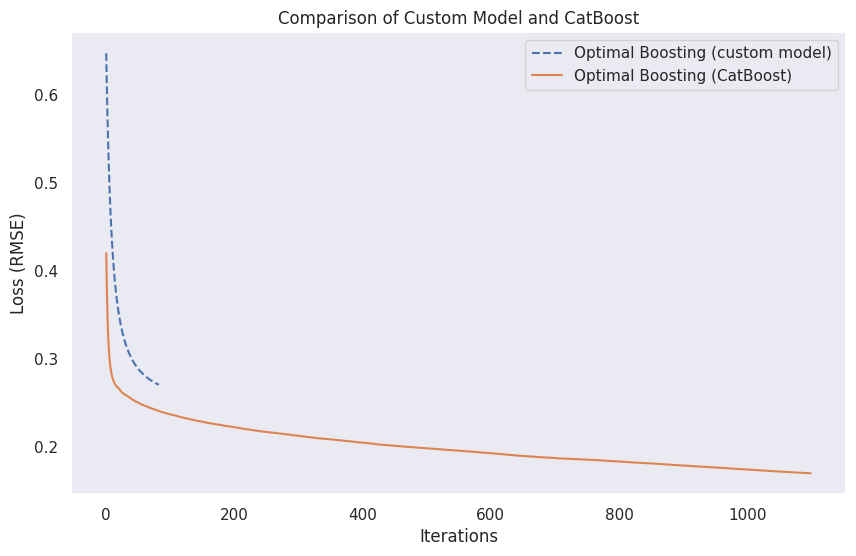

Training time (CatBoost): 1.186406135559082


In [123]:
optimal_params = study.best_params
catboost_training_time = study.best_trial.user_attrs["training_time"]


optimal_catboost = CatBoostRegressor(**optimal_params)
optimal_catboost.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

catboost_loss = optimal_catboost.evals_result_["learn"]["RMSE"]

plt.figure(figsize=(10, 6))
plt.plot(optimal_loss, label="Optimal Boosting (custom model)", linestyle="--")
plt.plot(catboost_loss, label="Optimal Boosting (CatBoost)", linestyle="-")
plt.title("Comparison of Custom Model and CatBoost")
plt.xlabel("Iterations")
plt.ylabel("Loss (RMSE)")
plt.legend()
plt.grid()
plt.show()

print("Training time (CatBoost):", catboost_training_time)

<font color='plum'>**Вопрос:** Какая архитектура вам нравится больше всего и почему?</font>

<font color='plum'>**Ответ**: Мне больше всего нравится CatBoost. На мой взгляд, одна из самых больших частей работы любого дата-аналитика или дата-саентиста — это не построение моделей и прогнозов, а предобработка данных. Этот процесс может быть очень долгим и утомительным. А когда он становится слишком долгим, ты начинаешь уставать и раздражаться — это можно понять даже по качеству выполнения этого ДЗ. Чем дальше задание от начала, тем хуже оно выполнено (по крайней мере, у меня так). И вот CatBoost берет на себя часть этой рутинной работы, что, честно говоря, очень приятно. Хотя это не столь актуально для нашей задачи, в реальной работе такая функциональность может сильно облегчить жизнь.

<font color='plum'>Еще один большой плюс CatBoost — это его встроенные механизмы борьбы с переобучением, которое часто случается при использовании градиентного бустинга. Например, в CatBoost реализован динамический бустинг, который помогает уменьшить вероятность переобучения. Более того, модель обучается достаточно быстро, экономя как человеческие, так и компьютерные ресурсы.

CatBoost также автоматически справляется с пропущенными значениями, что упрощает подготовку данных. Еще одна важная особенность — встроенная борьба с target leakage благодаря использованию симметричных забывчивых деревьев. И наконец, у CatBoost меньше гиперпараметров, которые необходимо перебирать, что экономит время на настройке модели. </font>

### Бонус. Random Forest (0.5 балла)

Если очень захотеть, оптуна может оптимизировать все, что угодно, даже нейросети. Давайте противопоставим бустингу его злейшего врага - алгоритм Random Forest.

Возьмите реализацию случайного леса из <font color='lightgreen'>`lightgbm`</font>. Посмотрите, какие там есть гиперпараметры, переберите что-либо из них вместе с `max_depth` и `n_estimators`.

Сравните его качество и динамику функции потерь (на обучающей и на валидационной выборке) с таковыми у бустинга и сделайте вывод, а нужен ли Random Forest?

In [19]:
from lightgbm import LGBMRegressor
import time

def objective_lgbm_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 100),
        "max_depth": trial.suggest_int("max_depth", 4, 20),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3, log=True),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.1, 0.9),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 10),
        "boosting_type": "rf",
        "objective": "regression",
        "metric": "rmse",
        "early_stopping_round": 10,
        "random_state": 42
    }

    model = LGBMRegressor(**params)

    start_time = time.time()
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)])
    end_time = time.time()

    training_time = end_time - start_time
    trial.set_user_attr("training_time", training_time)


    loss_history = model.evals_result_["training"]["rmse"]
    trial.set_user_attr("loss_history", loss_history)

    final_loss = loss_history[-1]
    return final_loss


pruner = optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=10)
study_lgbm_rf = optuna.create_study(
    study_name="lightgbm_rf_optimization",
    direction="minimize",
    pruner=pruner,
    storage="sqlite:///lightgbm_rf_study.db",
    load_if_exists=True
)

study_lgbm_rf.optimize(objective_lgbm_rf, n_trials=5)

best_trial_lgbm_rf = study_lgbm_rf.best_trial
print("Best parameters (LightGBM Random Forest):", best_trial_lgbm_rf.params)
print("Best RMSE (LightGBM Random Forest):", best_trial_lgbm_rf.value)
print("Training time (best trial, LightGBM Random Forest):", best_trial_lgbm_rf.user_attrs["training_time"])

[I 2024-12-22 10:40:20,778] Using an existing study with name 'lightgbm_rf_optimization' instead of creating a new one.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.5559980038556386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5559980038556386
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] bagging_fraction is set=0.5559980038556386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5559980038556386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 157
[LightGBM] [Info] Start training from score 0.650359
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Curren

[I 2024-12-22 10:40:21,161] Trial 9 finished with value: 0.2843779851989342 and parameters: {'n_estimators': 22, 'max_depth': 17, 'learning_rate': 0.034163914993519846, 'min_child_samples': 22, 'bagging_fraction': 0.5559980038556386, 'bagging_freq': 8}. Best is trial 9 with value: 0.2843779851989342.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.515238517076565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.515238517076565
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] bagging_fraction is set=0.515238517076565, subsample=1.0 will be ignored. Current value: bagging_fraction=0.515238517076565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 768
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 161
[LightGBM] [Info] Start training from score 0.650359
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current va

[I 2024-12-22 10:40:21,546] Trial 10 finished with value: 0.2807339108142972 and parameters: {'n_estimators': 82, 'max_depth': 8, 'learning_rate': 0.003407937903716736, 'min_child_samples': 20, 'bagging_fraction': 0.515238517076565, 'bagging_freq': 9}. Best is trial 10 with value: 0.2807339108142972.


Early stopping, best iteration is:
[31]	training's rmse: 0.281172	valid_1's rmse: 0.314981
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5171429779225674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5171429779225674
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5171429779225674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5171429779225674

[I 2024-12-22 10:40:21,880] Trial 11 finished with value: 0.27918052199520554 and parameters: {'n_estimators': 41, 'max_depth': 8, 'learning_rate': 0.0573265356883212, 'min_child_samples': 16, 'bagging_fraction': 0.5171429779225674, 'bagging_freq': 2}. Best is trial 11 with value: 0.27918052199520554.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 162
[LightGBM] [Info] Start training from score 0.650359
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=0.5171429779225674, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5171429779225674
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[15]	training's rmse: 0.279636	valid_1's rmse: 0.314167
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.3710160326658388, subsample=1.0

[I 2024-12-22 10:40:22,226] Trial 12 finished with value: 0.2804770236192526 and parameters: {'n_estimators': 28, 'max_depth': 7, 'learning_rate': 0.08191110727743592, 'min_child_samples': 20, 'bagging_fraction': 0.3710160326658388, 'bagging_freq': 5}. Best is trial 11 with value: 0.27918052199520554.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5939714603912046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5939714603912046
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5939714603912046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5939714603912046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 163
[LightGBM] [Info] Start training from score 0.650359
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Curren

[I 2024-12-22 10:40:22,552] Trial 13 finished with value: 0.27891420677098305 and parameters: {'n_estimators': 32, 'max_depth': 19, 'learning_rate': 0.009415766329166334, 'min_child_samples': 15, 'bagging_fraction': 0.5939714603912046, 'bagging_freq': 1}. Best is trial 13 with value: 0.27891420677098305.


Best parameters (LightGBM Random Forest): {'n_estimators': 32, 'max_depth': 19, 'learning_rate': 0.009415766329166334, 'min_child_samples': 15, 'bagging_fraction': 0.5939714603912046, 'bagging_freq': 1}
Best RMSE (LightGBM Random Forest): 0.27891420677098305
Training time (best trial, LightGBM Random Forest): 0.15674734115600586


In [23]:
optimal_params_lgbm_rf = study_lgbm_rf.best_params

optimal_params_lgbm_rf.update({
    "boosting_type": "rf",
    "metric": "rmse",
    "random_state": 42
})
lgbm_rf_training_time = study_lgbm_rf.best_trial.user_attrs["training_time"]

optimal_lgbm_rf = LGBMRegressor(**optimal_params_lgbm_rf)
optimal_lgbm_rf.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)]
)

lgbm_rf_loss = optimal_lgbm_rf.evals_result_["training"]["rmse"]

print("Training time (LightGBM Random Forest):", lgbm_rf_training_time)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5939714603912046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5939714603912046
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.5939714603912046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5939714603912046
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 18825, number of used features: 163
[LightGBM] [Info] Start training from score 0.650359
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Curren

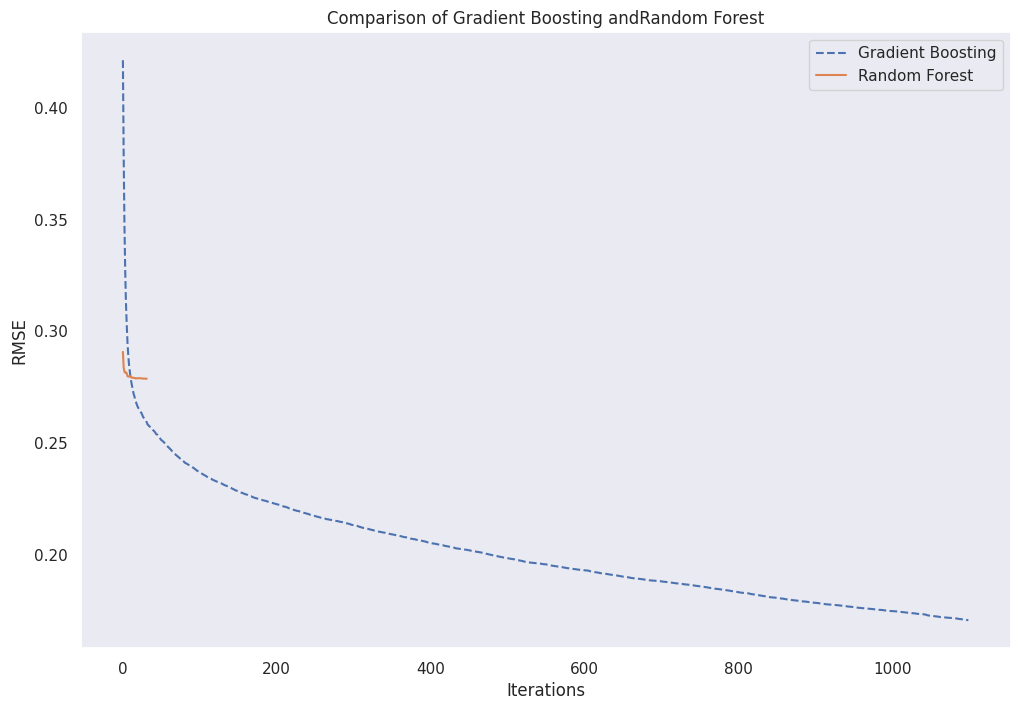

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(catboost_loss, label="Gradient Boosting", linestyle="--")
plt.plot(lgbm_rf_loss, label="Random Forest", linestyle="-")
plt.title("Comparison of Gradient Boosting andRandom Forest")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.show()

Как говорится, в этой жизни можно положиться только на себя, Бога и знания Евгения Андреевича. Сравнение градиентного бустинга с случайным лесом подтверждает все, что он нам объяснял на лекциях.

Во-первых, градиентный бустинг обучается значительно дольше, чем случайный лес — точнее, в 8 раз дольше (время обучения градиентного бустинга на оптимальных параметрах составило 1,15 минут, тогда как случайный лес обучился всего за 0,15 минут). Это вполне логично, ведь градиентный бустинг проводит больше итераций до достижения сходимости, чем случайный лес.

Во-вторых, длительное время обучения градиентного бустинга компенсируется более низкой ошибкой. Например, ошибка на тренировочных данных составила 0,27 для случайного леса против 0,17 у градиентного бустинга.

Вывод очевиден: градиентный бустинг — это оправданно популярный метод в машинном обучении. Конечно, выбор модели зависит от конкретной задачи, но в контексте наших данных случайный лес не справляется так же хорошо, как градиентный бустинг.

### 3.4. Бустинг и вероятности (0.5 балла)

С качеством мы более-менее разобрались, но что насчет вероятностей? Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности?

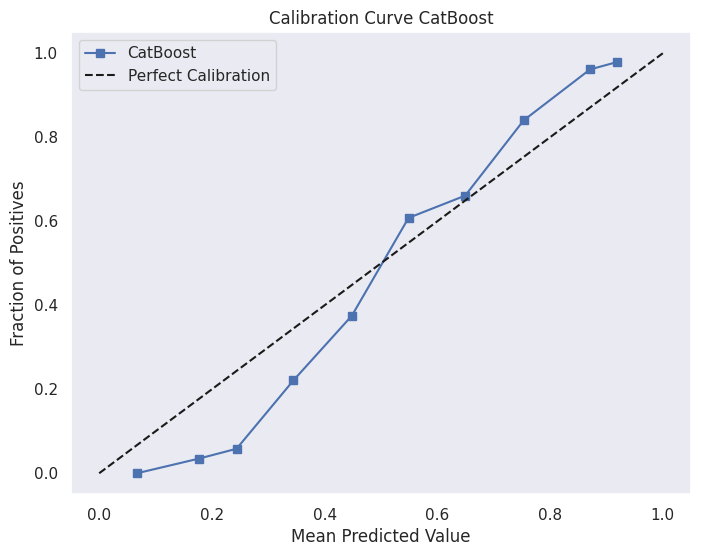

In [28]:
from sklearn.calibration import calibration_curve

y_pred = optimal_catboost.predict(X_valid)

y_pred_normalized = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

fraction_of_positives, mean_predicted_value = calibration_curve(y_valid, y_pred_normalized, n_bins=10, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="CatBoost")
plt.plot([0, 1], [0, 1], "k--", label="Perfect Calibration")
plt.title("Calibration Curve CatBoost")
plt.xlabel("Mean Predicted Value")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid()
plt.show()

В целом, CatBoost демонстрирует неплохие результаты в предсказании вероятностей, так как его отклонение от калибровочной прямой незначительно. Однако в некоторых областях, особенно в диапазоне низких вероятностей (0–0.3), модель заметно недооценивает их, что может привести к заниженной оценке вероятности наступления события. Хотя в среднем модель показывает адекватную калибровку, особенно в средних и высоких значениях вероятностей.


Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

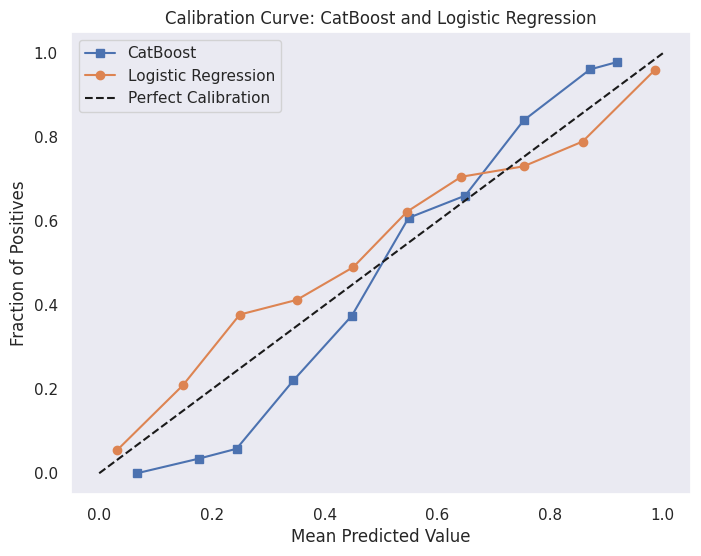

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict_proba(X_valid)[:, 1]

fraction_of_positives_logreg, mean_predicted_value_logreg = calibration_curve(
    y_valid, y_pred_logreg, n_bins=10, strategy='uniform'
)

plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="CatBoost")
plt.plot(mean_predicted_value_logreg, fraction_of_positives_logreg, "o-", label="Logistic Regression")
plt.plot([0, 1], [0, 1], "k--", label="Perfect Calibration")
plt.title("Calibration Curve: CatBoost and Logistic Regression")
plt.xlabel("Mean Predicted Value")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid()
plt.show()

CatBoost в некоторых диапазонах (особенно на высоких вероятностях) предсказывает вероятности точнее, но логистическая регрессия показывает лучшую стабильность и ближе к идеальной калибровке на низких и средних значениях.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2025 года?

коллеги, какая может быть социализация в предновогодние недели у студента, совмещающего две работы и учебу?((( поэтому пока перед работой быстренько бежишь за курилкой в табачку у дома, находишь елку по дороге, фоткаешься и загадываешь желание, чтобы в новым году а)бросить курить, б)научиться позволять себе отдыхать, в)получать меньше кармических уроков от жизни и г)продвинуться ближе к своей цели стать крутым ml-инженером

ссылка на папку с фото: https://drive.google.com/drive/folders/1vbQ19v5tD1aO8jREIgupIZvEOK6LkspH?usp=share_link

# *𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚*𖣂♱𖠰𖣂↟*𖠰ᨒ↟*𖥧˚